# Monet GAN Kaggle competition

## 1. Brief description of the problem and data

The goal of this project is to use a Generative Adversarial Network (GAN) to generate a set of jpg images that look like they were painted by Claude Monet, and then submit these images to a Kaggle competition. We are given a collection of small Monet images to use for training, and a collection of small photos to use as the basis for image generation.

A GAN is a type of machine learning framework that incorporates two different neural networks: a "generator" that creates fake data, and a "discriminator" that tries to detect fake data. Both networks are trained simultaneously, as the generator tries to fool the discriminator, and the discriminator tries to not be fooled. Eventually, after enough runs, we end up with a generator that can produce highly convincing data.

The task we're builiding a GAN to do is called image-to-image translation. We need to create a generator that take ordinary photos and "translate" them into Monet images.

In [1]:
from kaggle_datasets import KaggleDatasets

GCS_PATH = KaggleDatasets().get_gcs_path()

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

MONET_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/monet_tfrec/*.tfrec')
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/photo_tfrec/*.tfrec')
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

MONET_JPG_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/monet_jpg/*.jpg')
print('Monet JPG Files:', len(MONET_JPG_FILENAMES))

PHOTO_JPG_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/photo_jpg/*.jpg')
print('Photo JPG Files:', len(PHOTO_JPG_FILENAMES))

2025-11-29 04:30:23.278877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764390623.300634    1618 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764390623.307117    1618 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Monet TFRecord Files: 5
Photo TFRecord Files: 20
Monet JPG Files: 300
Photo JPG Files: 7038


## 2. Exploratory data analysis (EDA) — Inspect, visualize and clean the data

### Inspect data

First I would like to take a peek at the Monet and photo images. I know from the competition overview that all images are 256 x 256 with the three RBG color channels. 

In [3]:
IMAGE_SIZE = [256, 256]

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    # image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    return image

# def read_tfrecord(example):
#     tfrecord_format = {
#         "image_name": tf.io.FixedLenFeature([], tf.string),
#         "image": tf.io.FixedLenFeature([], tf.string),
#         "target": tf.io.FixedLenFeature([], tf.string)
#     }
#     example = tf.io.parse_single_example(example, tfrecord_format)
#     image = decode_image(example['image'])
#     return image

# def decode_image(image_bytes):
#     image = tf.image.decode_jpeg(image_bytes, channels=3)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = tf.reshape(image, [*IMAGE_SIZE, 3])
#     return image

# def read_tfrecord(example):
#     features = {
#         'image/encoded': tf.io.FixedLenFeature([], tf.string),
#         'image/height': tf.io.FixedLenFeature([], tf.int64),
#         'image/width': tf.io.FixedLenFeature([], tf.int64),
#         'image/filename': tf.io.FixedLenFeature([], tf.string),
#         'image/source_id': tf.io.FixedLenFeature([], tf.string),
#         'image/format': tf.io.FixedLenFeature([], tf.string)
#     }
#     example = tf.io.parse_single_example(example, features)
#     image_bytes = example['image/encoded']
#     image = decode_image(image_bytes)
#     return image

# monet_ds = tf.data.TFRecordDataset(MONET_FILENAMES).map(read_tfrecord).cache()

# photo_ds = tf.data.TFRecordDataset(PHOTO_FILENAMES).map(read_tfrecord).cache()

# for _monet_image in monet_ds.take(1):
#     print(f"Monet image batch shape: {_monet_image.shape}")

# for _photo_image in photo_ds.take(1):
#     print(f"Photo image batch shape: {_photo_image.shape}")

# monet_tfrec_paths = tf.io.gfile.glob('monet_tfrec/*.tfrec')
# monet_ds = tf.data.TFRecordDataset(monet_tfrec_paths).map(read_tfrecord).cache()

# photo_tfrec_paths = tf.io.gfile.glob('photo_tfrec/*.tfrec')
# photo_ds = tf.data.TFRecordDataset(photo_tfrec_paths).map(read_tfrecord).cache()

def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, features)
    image = decode_image(example['image'])
    return image

# monet_tfrec_paths = tf.io.gfile.glob('monet_tfrec/*.tfrec')
# monet_ds = tf.data.TFRecordDataset(monet_tfrec_paths).map(read_tfrecord).cache()

# photo_tfrec_paths = tf.io.gfile.glob('photo_tfrec/*.tfrec')
# photo_ds = tf.data.TFRecordDataset(photo_tfrec_paths).map(read_tfrecord).cache()

monet_ds = tf.data.TFRecordDataset(MONET_FILENAMES).map(read_tfrecord).cache()

photo_ds = tf.data.TFRecordDataset(PHOTO_FILENAMES).map(read_tfrecord).cache()

for _monet_image in monet_ds.take(1):
    print(f"Monet image batch shape: {_monet_image.shape}")

for _photo_image in photo_ds.take(1):
    print(f"Photo image batch shape: {_photo_image.shape}")


I0000 00:00:1764390629.162624    1618 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764390629.163194    1618 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Monet image batch shape: (256, 256, 3)
Photo image batch shape: (256, 256, 3)


In [4]:
# def load_dataset(filenames, labeled=True, ordered=False):
#     dataset = tf.data.TFRecordDataset(filenames)
#     dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
#     return dataset

# monet_ds = load_dataset(MONET_FILENAMES, labeled=True).batch(1)
# photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1)

In [5]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# def load_dataset(filenames, labeled=True, ordered=False):
#     dataset = tf.data.TFRecordDataset(filenames)
#     dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
#     return dataset

# monet_ds = load_dataset(MONET_FILENAMES, labeled=True).batch(1)
# photo_ds = load_dataset(PHOTO_FILENAMES, labeled=True).batch(1)

### Visualize data

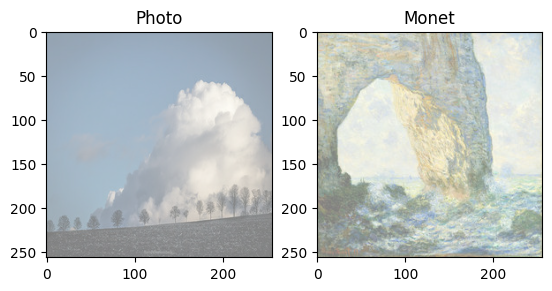

In [6]:
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet')
plt.imshow(example_monet * 0.5 + 0.5)

The sample images look right. But I am also going to check the shape to make sure they're good.

In [7]:
for _monet_image in monet_ds.take(1):
    print(f"Monet image batch shape: {_monet_image.shape}")

for _photo_image in photo_ds.take(1):
    print(f"Photo image batch shape: {_photo_image.shape}")

Monet image batch shape: (256, 256, 3)
Photo image batch shape: (256, 256, 3)


### Clean data

Now I want to do some data cleaning to make the training easier. First, I will normalize the images to values between -1 and 1. Then, I will configure the datasets with shuffling, batching, and prefetching for optimal training performance.

In [8]:
def normalize_img(image):
    return (image * 2) - 1

monet_ds = monet_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
photo_ds = photo_ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

BATCH_SIZE = 1
monet_ds = monet_ds.shuffle(100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
photo_ds = photo_ds.shuffle(100).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


As a sanity check, I'm going look at a normalized image and see it's new pixel values in a histogram.

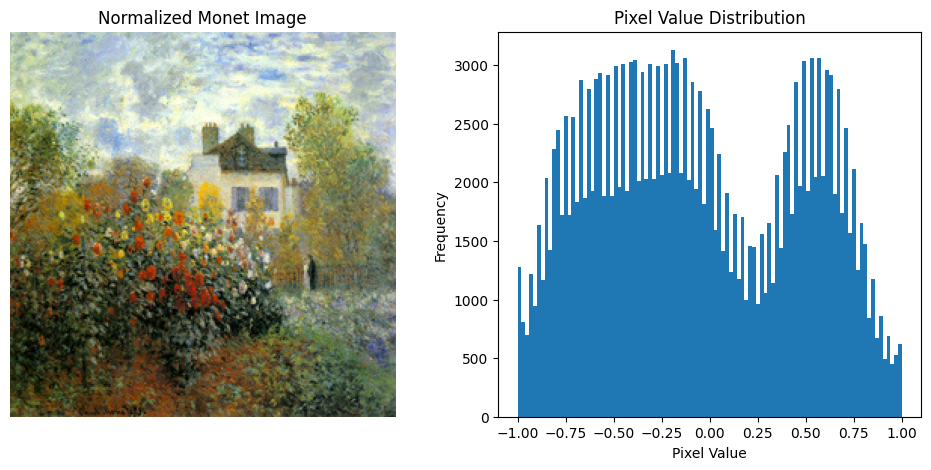

In [9]:
for example_monet in monet_ds.take(1):
    # The image is in batch format (1, 256, 256, 3), take the first one
    img = example_monet[0]

    plt.figure(figsize=(12, 5))

    # Display the image
    plt.subplot(1, 2, 1)
    # Rescale from [-1, 1] to [0, 1] for visualization
    plt.imshow((img * 0.5 + 0.5))
    plt.title('Normalized Monet Image')
    plt.axis('off')

    # Plot histogram of pixel values
    plt.subplot(1, 2, 2)
    plt.hist(img.numpy().flatten(), bins=100)
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.show()

## 3. Model architecture

**Generator architecture**

In [10]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, LeakyReLU, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
      Conv2D(filters, size, strides=2, padding='same',
             kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        # Using BatchNormalization as a proxy for InstanceNormalization 
        # (CycleGAN typically uses InstanceNorm, but BatchNorm is a standard fallback in TF core)
        result.add(BatchNormalization())

    result.add(LeakyReLU())
    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
      Conv2DTranspose(filters, size, strides=2, padding='same',
                      kernel_initializer=initializer, use_bias=False))

    result.add(BatchNormalization())

    if apply_dropout:
        result.add(Dropout(0.5))

    result.add(Activation('relu'))
    return result

def Generator():
    inputs = Input(shape=[256, 256, 3])

    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 128, 128, 64)
        downsample(128, 4), # (bs, 64, 64, 128)
        downsample(256, 4), # (bs, 32, 32, 256)
        downsample(512, 4), # (bs, 16, 16, 512)
        downsample(512, 4), # (bs, 8, 8, 512)
        downsample(512, 4), # (bs, 4, 4, 512)
        downsample(512, 4), # (bs, 2, 2, 512)
        downsample(512, 4), # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4), # (bs, 16, 16, 1024)
        upsample(256, 4), # (bs, 32, 32, 512)
        upsample(128, 4), # (bs, 64, 64, 256)
        upsample(64, 4), # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = Conv2DTranspose(3, 4,
                           strides=2,
                           padding='same',
                           kernel_initializer=initializer,
                           activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and skipping
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)

    return Model(inputs=inputs, outputs=x)

# Instantiate the generator and verify the architecture
generator = Generator()
generator.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128, 128,  │      3,072 │ input_layer[0][0] │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 64, 64,    │    131,584 │ sequential[0][0]  │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 32, 32,    │    525,312 │ sequential_1[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 16, 16,    │  2,099,200 │ sequential_2[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 8, 8, 512) │  4,196,352 │ sequential_3[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 4, 4, 512) │  4,196,352 │ sequential_4[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 2, 2, 512) │  4,196,352 │ sequential_5[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 1, 1, 512) │  4,196,352 │ sequential_6[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 2, 2, 512) │  4,196,352 │ sequential_7[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2, 2,      │          0 │ sequential_8[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 4, 4, 512) │  8,390,656 │ concatenate[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 4, 4,      │          0 │ sequential_9[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_10       │ (None, 8, 8, 512) │  8,390,656 │ concatenate_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 8, 8,      │          0 │ sequential_10[0]… │
│ (Concatenate)       │ 1024)             │            │ sequential_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_11       │ (None, 16, 16,    │  8,390,656 │ concatenate_2[0]… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 16, 16,    │          0 │ sequential_11[0]

 Total params: 54,425,859 (207.62 MB)

 Trainable params: 54,414,979 (207.58 MB)

 Non-trainable params: 10,880 (42.50 KB)

**Discriminator architecture**

In [11]:
from tensorflow.keras.layers import ZeroPadding2D

def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = Input(shape=[256, 256, 3], name='input_image')

    x = inp

    x = downsample(64, 4, apply_instancenorm=False)(x)
    x = downsample(128, 4)(x)
    x = downsample(256, 4)(x)

    x = ZeroPadding2D()(x)

    x = Conv2D(512, 4, strides=1,
               kernel_initializer=initializer,
               use_bias=False)(x)

    x = BatchNormalization(gamma_initializer=gamma_init)(x)

    x = LeakyReLU()(x)

    x = ZeroPadding2D()(x)

    last = Conv2D(1, 4, strides=1,
                  kernel_initializer=initializer)(x)

    return Model(inputs=inp, outputs=last)

monet_discriminator = Discriminator()
photo_discriminator = Discriminator()

monet_discriminator.summary()

# Verify with a sample batch from the dataset
example_monet = next(iter(monet_ds.take(1)))
disc_out = monet_discriminator(example_monet)
print(f"Discriminator output shape: {disc_out.shape}")

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_15 (Sequential)      │ (None, 128, 128, 64)   │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ (None, 64, 64, 128)    │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 32, 32, 256)    │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 34, 34, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 31, 31, 512)    │     2,097,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 31, 31, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 31, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 33, 33, 512)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 1)      │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,767,361 (10.56 MB)

 Trainable params: 2,765,569 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

I0000 00:00:1764390632.878450    1618 cuda_dnn.cc:529] Loaded cuDNN version 90300


Discriminator output shape: (1, 30, 30, 1)


**CycleGAN model**

In [12]:
monet_generator = Generator()
photo_generator = Generator()

class CycleGan(tf.keras.Model):
    def __init__(self, monet_generator, photo_generator, monet_discriminator, photo_discriminator, lambda_cycle=10):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(self, m_gen_optimizer, p_gen_optimizer, m_disc_optimizer, p_disc_optimizer, gen_loss_fn, disc_loss_fn, cycle_loss_fn, identity_loss_fn):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # Photo to Monet back to Photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)
            
            # Monet to Photo back to Monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)
            
            # Generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)
            
            # Discriminator used on real and fake images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            
            disc_real_photo = self.p_disc(real_photo, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)
            
            # Calculate the loss
            gen_m_loss = self.gen_loss_fn(disc_fake_monet)
            gen_p_loss = self.gen_loss_fn(disc_fake_photo)
            
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo[0], cycled_photo, self.lambda_cycle)
            
            # Total Generator loss = Adversarial loss + Cycle loss + Identity loss
            total_gen_m_loss = gen_m_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_gen_p_loss = gen_p_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)
            
            disc_m_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            disc_p_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)
            
        # Calculate the gradients for generator and discriminator
        monet_gen_gradients = tape.gradient(total_gen_m_loss, self.m_gen.trainable_variables)
        photo_gen_gradients = tape.gradient(total_gen_p_loss, self.p_gen.trainable_variables)
        
        monet_disc_gradients = tape.gradient(disc_m_loss, self.m_disc.trainable_variables)
        photo_disc_gradients = tape.gradient(disc_p_loss, self.p_disc.trainable_variables)
        
        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_gen_gradients, self.m_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_gen_gradients, self.p_gen.trainable_variables))
        
        self.m_disc_optimizer.apply_gradients(zip(monet_disc_gradients, self.m_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_disc_gradients, self.p_disc.trainable_variables))
        
        return {
            "monet_gen_loss": total_gen_m_loss,
            "photo_gen_loss": total_gen_p_loss,
            "monet_disc_loss": disc_m_loss,
            "photo_disc_loss": disc_p_loss
        }

**Loss functions**

In [13]:
# Loss functions
with tf.name_scope("losses"):
    loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def discriminator_loss(real, generated):
        real_loss = loss_obj(tf.ones_like(real), real)
        generated_loss = loss_obj(tf.zeros_like(generated), generated)
        total_disc_loss = real_loss + generated_loss
        return total_disc_loss * 0.5

    def generator_loss(generated):
        return loss_obj(tf.ones_like(generated), generated)

    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
        return LAMBDA * loss1

    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

# Optimizers
monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Instantiate the CycleGAN model
# Note: monet_generator, photo_generator, monet_discriminator, photo_discriminator were instantiated in previous cells
cycle_gan_model = CycleGan(
    monet_generator, photo_generator, monet_discriminator, photo_discriminator
)

# Compile the model
cycle_gan_model.compile(
    m_gen_optimizer=monet_generator_optimizer,
    p_gen_optimizer=photo_generator_optimizer,
    m_disc_optimizer=monet_discriminator_optimizer,
    p_disc_optimizer=photo_discriminator_optimizer,
    gen_loss_fn=generator_loss,
    disc_loss_fn=discriminator_loss,
    cycle_loss_fn=calc_cycle_loss,
    identity_loss_fn=identity_loss
)

## 4. Results and analysis

In [14]:
class GANWatcher(tf.keras.callbacks.Callback):
    def __init__(self, num_img=1):
        self.num_img = num_img
        # Select a consistent sample from photo_ds for visualization
        self.test_photo = next(iter(photo_ds.take(1)))

    def on_epoch_end(self, epoch, logs=None):
        # p_gen is the photo generator (Photo -> Monet)
        prediction = self.model.p_gen(self.test_photo)
        
        # Scale from [-1, 1] to [0, 1]
        prediction = (prediction * 0.5) + 0.5
        input_photo = (self.test_photo * 0.5) + 0.5

        plt.figure(figsize=(12, 5))
        
        for i in range(self.num_img):
            plt.subplot(1, 2, 1)
            plt.imshow(input_photo[i])
            plt.title("Input Photo")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(prediction[i])
            plt.title("Generated Monet")
            plt.axis("off")
            
        plt.show()
        plt.close()

# Instantiate the callback
plotter = GANWatcher()

# Zip the datasets
final_dataset = tf.data.Dataset.zip((monet_ds, photo_ds))

Let's train the model

Epoch 1/25


I0000 00:00:1764390671.562694    1651 service.cc:148] XLA service 0x7e40a4019890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764390671.562750    1651 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764390671.562754    1651 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
E0000 00:00:1764390685.602156    1651 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1764390685.798769    1651 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1764390707.571624    1651 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


    300/Unknown 134s 202ms/step - monet_disc_loss: 0.6455 - monet_gen_loss: 5.2058 - photo_disc_loss: 0.6656 - photo_gen_loss: 5.2897

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


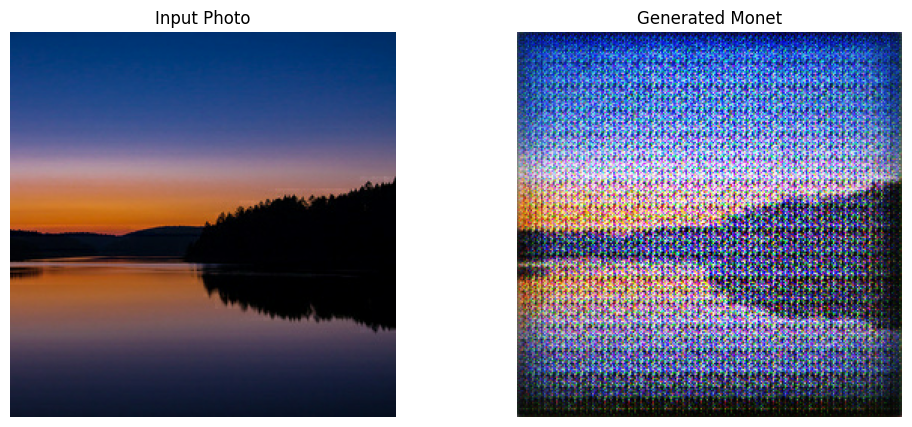

300/300 ━━━━━━━━━━━━━━━━━━━━ 135s 205ms/step - monet_disc_loss: 0.6448 - monet_gen_loss: 5.1995 - photo_disc_loss: 0.6651 - photo_gen_loss: 5.2825
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - monet_disc_loss: 0.6143 - monet_gen_loss: 3.6965 - photo_disc_loss: 0.6419 - photo_gen_loss: 3.6508

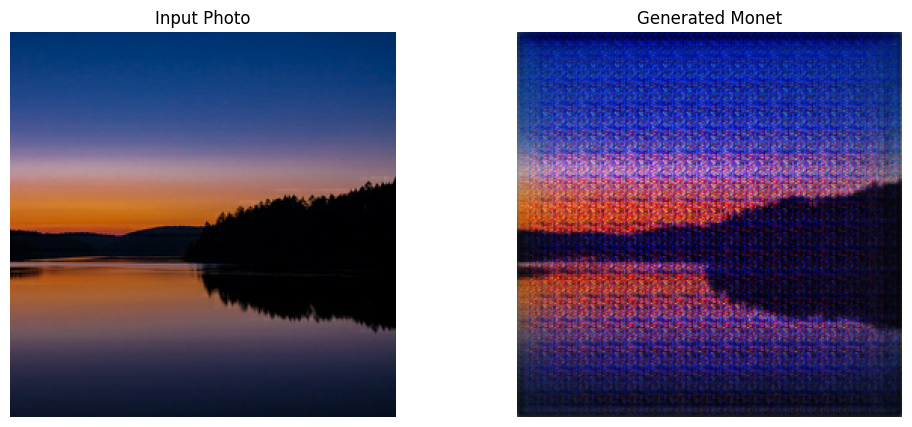

300/300 ━━━━━━━━━━━━━━━━━━━━ 62s 205ms/step - monet_disc_loss: 0.6135 - monet_gen_loss: 3.6960 - photo_disc_loss: 0.6412 - photo_gen_loss: 3.6521
Epoch 3/25
 44/300 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - monet_disc_loss: 0.6283 - monet_gen_loss: 3.5934 - photo_disc_loss: 0.6541 - photo_gen_loss: 3.6409

KeyboardInterrupt: 

In [15]:
cycle_gan_model.fit(
    final_dataset,
    epochs=25,
    callbacks=[plotter]
)

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img[0], training=False).numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img[0])
    ax[i, 1].imshow(prediction[0])
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Monet-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

### Hyperparameter optimization

### Kaggle competition score

### What worked

### What could be improved

## 5. Conclusion